<a href="https://colab.research.google.com/github/Puisque/object-natural-scenes-detection/blob/main/final_version_of_natural_scene_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Loading Gesture Images from Google Drive
import os 
import torch
import numpy as np
import time

import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torchvision import datasets, transforms



In [ ]:
# location on Google Drive
master_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene'

train_dir = os.path.join(master_path, 'train/')
val_dir = os.path.join(master_path, 'validation/')
test_dir = os.path.join(master_path, 'test/')



# Data Loading

In [ ]:
def get_train_data_loader(batch_Size, num_Workers):
    """ Loads images
    """
    transform = transforms.Compose([transforms.Resize((224,224)), 
                                    transforms.ToTensor()])
    
    train_data = datasets.ImageFolder(train_dir, transform=transform)

    classes = train_data.classes

    indices = list(range(len(train_data)))
    print('indices = ',indices)

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(indices)

    chosen_index = indices[:] 
    print('chosen_index = ',chosen_index)
  
    train_sampler = SubsetRandomSampler(chosen_index)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_Size,
                                               num_workers=num_Workers, sampler=train_sampler)
    
    return train_loader, classes
    

In [ ]:
def get_val_data_loader(batch_Size, num_Workers):
    """ Loads images
    """
    transform = transforms.Compose([transforms.Resize((224,224)), 
                                    transforms.ToTensor()])
    
    val_data = datasets.ImageFolder(val_dir, transform=transform)

    classes = val_data.classes

    indices = list(range(len(val_data)))
    print('indices = ',indices)

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(indices)

    chosen_index = indices[:] # whow we get small dataset: choose all images
    print('chosen_index = ',chosen_index)
    
    val_sampler = SubsetRandomSampler(chosen_index)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_Size,
                                               num_workers=num_Workers, sampler=val_sampler)
    
    return val_loader, classes
    

In [ ]:
def get_test_data_loader(batch_Size, num_Workers):
    """ Loads images
    """
    transform = transforms.Compose([transforms.Resize((224,224)), 
                                    transforms.ToTensor()])
    
    test_data = datasets.ImageFolder(test_dir, transform=transform)

    classes = test_data.classes

    indices = list(range(len(test_data)))
    print('indices = ',indices)

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(indices)

    chosen_index = indices[:] # whow we get small dataset: choose all images
    print('chosen_index = ',chosen_index)
 
    test_sampler = SubsetRandomSampler(chosen_index)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_Size,
                                               num_workers=num_Workers, sampler=test_sampler)
    
    return test_loader, classes
    

# Data Visualization

In [ ]:
train_loader, data_class = get_train_data_loader(1, 1)

indices =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
print("Training data:", len(train_loader))
print(data_class)

Training data: 10494
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
torch.cuda.is_available ()

True

# Transfer learning

load the AlexNet network, with pretrained weights. PyTorch will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
features = alexnet.features

In [ ]:
val_loader, data_class = get_val_data_loader(1, 1)

indices =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
print("Val data:", len(val_loader))
print(data_class)

Val data: 2622
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
test_loader, data_class = get_test_data_loader(1, 1)

indices =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
print("Test data:", len(test_loader))
print(data_class)

Test data: 2647
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:

# Save Features to Folder (assumes code from 1. has been evaluated)

import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)



# Prepare Dataloader (requires code from 1.)
batch_size = 1 # save 1 file at a time, hence batch_size = 1
num_workers = 1


classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

def features_to_folder(data_loader, mast·er_path):
    # save features to folder as tensors
    n = 0
    for img, label in data_loader:
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      for i, img in enumerate(img, 0):
        folder_name = master_path + str(classes[label[i]])
        print(folder_name)
        if not os.path.isdir(folder_name):
          os.makedirs(folder_name)
        torch.save(features_tensor[i], folder_name + '/' + str(n) + '.tensor')
        print(folder_name + '/' + str(n) + '.tensor')
      n += 1

train_f = os.path.join(master_path, 'train_f/')
val_f = os.path.join(master_path, 'val_f/')
test_f = os.path.join(master_path, 'test_f/')


In [ ]:
print(train_f)
print(val_f)
print(test_f)

/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_f/
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/


In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

10494
2622
2647


In [ ]:
features_to_folder(train_loader, train_f)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/forest
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/forest/7994.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/mountain
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/mountain/7995.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/forest
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/forest/7996.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/mountain
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/mountain/7997.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f/glacier
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f

In [ ]:
features_to_folder(val_loader, val_f)

In [ ]:
features_to_folder(test_loader, test_f)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/forest
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/forest/147.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/buildings
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/buildings/148.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/sea
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/sea/149.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/glacier
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/glacier/150.tensor
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/buildings
/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f/buildings/151.ten

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
import torchvision.models

In [ ]:
class CNN_AlexNet(nn.Module):
      
      def __init__(self):
          self.name = "CNN_AlexNet"
          super(CNN_AlexNet, self).__init__()
          self.conv1 = nn.Conv2d(256, 60, 2) #in_channels, out_chanels, kernel_size
          self.conv2 = nn.Conv2d(60, 10, 2) #in_channels, out_chanels, kernel_size
          
          self.fc1 = nn.Linear(160, 32)
          self.fc2 = nn.Linear(32, 6)


      def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(self.conv2(x))
          x = x.view(-1, 160)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
# load features
# location on Google Drive
train_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/train_f'
valid_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/val_f'
test_path = '/content/gdrive/MyDrive/Capstone/Code/natural scene dataset /natural scene/test_f'

# Load data from Google Drive
train_loader1 = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
val_loader1 = torchvision.datasets.DatasetFolder(valid_path, loader=torch.load, extensions=('.tensor'))
test_loader1 = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))

In [ ]:
torch.cuda.is_available ()

True

In [ ]:
print('the length of the loaded training tensors is {}'.format(len(train_loader1)))

the length of the loaded training tensors is 10493


In [ ]:
print('the length of the loaded valuation tensors is {}'.format(len(val_loader1)))

the length of the loaded valuation tensors is 2622


In [ ]:
print('the length of the loaded testing tensors is {}'.format(len(test_loader1)))

the length of the loaded testing tensors is 2647


In [ ]:
def get_accuracy_tp(model, train_loader, valid_loader, train=False):
    if train:
        data = train_loader
    else:
        data = valid_loader
    correct = 0
    total = 0
    for imgs, labels in data:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


CUDA is available!  Training on GPU ...
Training Started...
0 0.5031926045935385 0.5007627765064836
1 0.691508624797484 0.6922196796338673
2 0.7774706947488802 0.7684973302822273
3 0.8385590393595731 0.8241800152555301
4 0.8652434956637759 0.8600305110602593
5 0.8679119412941961 0.8573607932875668
6 0.8847803297436386 0.8790999237223494
7 0.8910702373010578 0.881769641495042
8 0.8862098541885066 0.8749046529366895
9 0.8989802725626608 0.8821510297482837
10 0.8953588106356619 0.8787185354691075
11 0.8890689030782426 0.8745232646834478
12 0.9101305632326313 0.8874904652936689
13 0.9035547507862385 0.8790999237223494
14 0.9086057371581054 0.8840579710144928
15 0.9105117697512628 0.8886346300533944
16 0.9036500524158964 0.8825324180015256
17 0.9184218050128657 0.8909229595728452
18 0.9209949490136281 0.8935926773455377
19 0.9203278376060231 0.8909229595728452
Finished Training
Total time elapsed: 1536.85 seconds


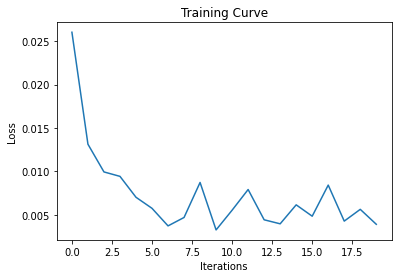

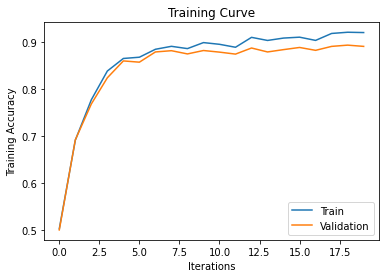

In [ ]:
# Prepare Dataloader
#batch_size = 32
use_cuda = True
model = CNN_AlexNet()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
# training
print ("Training Started...")
start_time = time.time()

train_dataset = train_loader1
valid_dataset = val_loader1
batch_size=64
learning_rate=0.001
num_epochs=20
num_workers = 1

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

iters, losses, train_acc, val_acc = [], [], [], []
# training
epoch = 0 # the number of iterations
for epoch in range(num_epochs):
    for features, labels in iter(train_loader):
      
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################
        
          
        out = model(features)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch



    # save the current training information
    iters.append(epoch)
    losses.append(float(loss)/batch_size)             # compute *average* loss
    train_acc.append(get_accuracy_tp(model, train_loader, valid_loader, train=True)) # compute training accuracy
    
    val_acc.append(get_accuracy_tp(model, train_loader, valid_loader, train=False))  # compute validation accuracy
    model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, epoch)
    print(epoch, train_acc[-1], val_acc[-1])
    torch.save(model.state_dict(), model_path)

print('Finished Training')
end_time = time.time()
elapsed_time = end_time - start_time
print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    
# plotting
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

Accuracy 

In [ ]:
test_dataset = train_loader1
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)


In [ ]:
def get_test_accuracy(model, test_loader):
    data = test_loader
    correct = 0
    total = 0
    for features, labels in data:
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(features)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total



test_accuracy = get_test_accuracy(model, test_loader)

print("test accuracy:", test_accuracy)

test accuracy: 0.9203278376060231
